In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [57]:
import numpy as np

def rk4_step(f, fi, t, w, h):
    k1 = h * fi
    k2 = h * f(t + h / 2, w + k1 / 2)
    k3 = h * f(t + h / 2, w + k2 / 2)
    k4 = h * f(t + h, w + k3)
    return (k1 + 2 * k2 + 2 * k3 + k4) / 6

def apc4(f, a, b, yo, N, p):
    h = (b - a) / N
    w = yo
    t = a

    ws = np.zeros(N + 1)
    ts = np.zeros(N + 1)
    fi = fim1 = fim2 = fim3 = 0

    for i in range(N):
        ts[i] = t
        ws[i] = w
        fim3, fim2, fim1 = fim2, fim1, fi
        fi = f(t, w)
        
        if i < 3:
            
            w += rk4_step(f, fi, t, w, h)
        else:
            # Predictor Adams-Bashforth de 4 pasos
            w = ws[i] + h * (55 * fi - 59 * fim1 + 37 * fim2 - 9 * fim3) / 24
            
            # Corrector Adams-Moulton de 3 pasos, iterado p veces
            
            for _ in range(p):
                
                w = ws[i] + h * (9 * f(t + h, w) + 19 * fi - 5 * fim1 + fim2) / 24
                
            
        
        t += h

    ws[N] = w
    ts[N] = t

    return ts, ws


def f(t, y):
    return y / t - (y / t) ** 2


def exacta(t):
    return t / (1 + np.log(t))

# Parámetros del problema
a = 1
b = 2
yo = 1
N = 10






(array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]), array([1.        , 1.0042815 , 1.014952  , 1.02981334, 1.04752546,
       1.06724992, 1.08841816, 1.1106394 , 1.13363728, 1.15721181,
       1.1812154 ])) (array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]), array([1.        , 1.0042815 , 1.014952  , 1.02981334, 1.04752542,
       1.06724987, 1.08841811, 1.11063935, 1.13363724, 1.15721176,
       1.18121535])) (array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]), array([1.        , 1.0042815 , 1.014952  , 1.02981334, 1.04752542,
       1.06724987, 1.08841811, 1.11063935, 1.13363724, 1.15721177,
       1.18121536]))


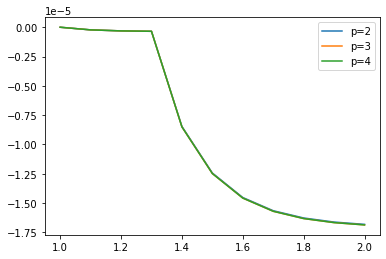

In [58]:

sol_apc2 = apc4(f, a, b, yo, 10, 2)
sol_apc3 = apc4(f, a, b, yo, 10, 3)
sol_apc4 = apc4(f, a, b, yo, 10, 4)
plt.plot(sol_apc2[0], sol_apc2[1] - exacta(sol_apc2[0]), label='p=2')
plt.plot(sol_apc3[0], sol_apc3[1] - exacta(sol_apc3[0]), label='p=3')
plt.plot(sol_apc4[0], sol_apc4[1] - exacta(sol_apc4[0]), label='p=4')
plt.legend()
print(sol_apc2, sol_apc3, sol_apc4)
#Debe haber error en la iteración, debido a que dan el mismo resultado